In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import json
from pandas.io.json import json_normalize

In [2]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
pensActivity['created'].replace(0, np.nan, inplace=True)
pensActivity['lastmodified'].replace(0, np.nan, inplace=True)
pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensActivity['notes'] = pensActivity['notes'].astype('category')
pensActivity.sort_values(by='created', inplace=True)

In [3]:
pensActivity.head(50)
#maybe i need to drop columns : status_id, notes, time_to_process

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 15:32:19,2014-12-15 15:32:19,0,2
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,"{""pen_uid"":""91ff826f0b001e00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:52:19,2014-12-15 15:52:19,0,7
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",Insufficient permissions for object at index 3,0,2014-12-15 15:56:09,2014-12-15 15:56:09,0,5
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6
835544,0,0,efc48f94960ede2dd38369037d5d89de8b9b46b2,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 17:51:11,2014-12-15 17:51:11,0,2
342984,1509709,987039,62686a44d3797b8545b74a328af5485b91c4c293,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 17:53:12,2014-12-15 17:53:12,0,4
879601,1509709,987039,fc6150f086b4a553ac09aeca5b29e8ec9ed871fb,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 18:48:18,2014-12-15 18:48:18,0,3
119385,1509709,987039,2234e3c9ecd0cb058444ac09551a0f9d6c13a69b,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 18:48:39,2014-12-15 18:48:39,0,4
430918,1509709,987039,7baaa0dbf7641058af8204bee70c3fddcdb77f73,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 18:49:17,2014-12-15 18:49:17,0,1


In [4]:
pensActivity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892213 entries, 131729 to 696049
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   visit_id         892213 non-null  int64         
 1   pen_id           892213 non-null  int64         
 2   fingerprint      892213 non-null  object        
 3   activity         892213 non-null  object        
 4   notes            8 non-null       category      
 5   status_id        892213 non-null  int64         
 6   created          892213 non-null  datetime64[ns]
 7   lastmodified     892213 non-null  datetime64[ns]
 8   time_to_process  892213 non-null  int64         
 9   count_items      892213 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(5), object(2)
memory usage: 68.9+ MB


In [5]:
pensActivity.describe()

,visit_id,pen_id,status_id,time_to_process,count_items
count,8.922130e+05,8.922130e+05,892213.000000,892213.000000,892213.000000
mean,1.040977e+08,1.539013e+06,0.999991,635.420615,24.663077
std,2.797603e+07,1.923735e+05,0.002994,1342.509685,39.960441
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,9.570889e+07,1.521253e+06,1.000000,135.000000,5.000000
50%,1.103950e+08,1.522861e+06,1.000000,299.000000,12.000000
75%,1.213357e+08,1.524457e+06,1.000000,718.000000,28.000000
max,1.328067e+08,3.860073e+06,1.000000,475947.000000,1235.000000


In [137]:
pensActivity['visit_id'].value_counts()
#these visits were the most active

1526919      457
1585363      133
1586155      104
97337717      39
113393783     35
            ... 
131027791      1
116966907      1
108675693      1
114027013      1
0              1
Name: visit_id, Length: 528818, dtype: int64

In [9]:
pensActivity_openinghours = pensActivity.set_index('created')

In [10]:
pensActivity_openinghours = pensActivity_openinghours.between_time('10:00', '18:00')

In [11]:
pensActivity_openinghours.reset_index(inplace=True)

## breakdown activity by time 

In [12]:
activity_by_month = pensActivity_openinghours['created'].groupby(pensActivity_openinghours.created.dt.to_period("M")).agg('count')
activity_by_month.nlargest(50)
#what month was the most active

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


created
2016-07    30894
2016-04    27488
2016-08    26896
2016-05    25872
2016-03    23858
2016-06    23201
2016-02    19627
2016-12    19465
2017-04    18794
2017-07    18587
2016-10    18347
2016-09    18045
2015-12    18008
2015-04    17587
2016-11    17529
2017-08    17464
2015-11    17452
2017-01    16782
2016-01    16507
2017-02    15970
2015-10    15305
2015-08    15018
2015-07    14832
2015-05    14721
2015-03    14706
2017-03    14001
2017-06    13501
2017-05    13009
2015-09    12414
2017-09    11688
2019-07    11312
2015-06    11300
2017-12    11021
2019-08    10560
2017-10    10323
2018-01     9680
2017-11     9172
2018-10     8787
2018-08     8527
2019-12     8369
2018-05     8242
2018-09     8066
2019-09     7999
2018-12     7928
2019-06     7866
2019-11     7568
2018-07     7499
2020-01     7393
2018-11     7096
2018-04     6943
Freq: M, Name: created, dtype: int64

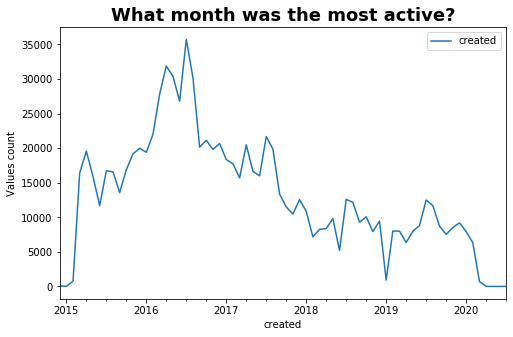

In [11]:
plt.figure(figsize=(8,5))
plt.title('What month was the most active?', fontdict={'fontweight': 'bold', 'fontsize':18})

activity_by_month.plot()
plt.ylabel('Values count')
plt.legend()
# plt.savefig('monthly_activity.png', dpi=300)

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


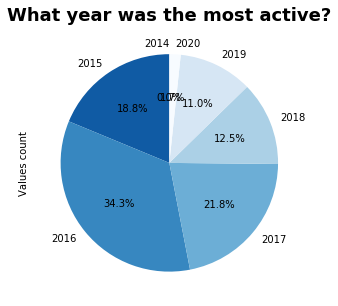

In [10]:
activity_by_year = pensActivity['created'].groupby(pensActivity.created.dt.to_period("Y")).agg('count')

plt.figure(figsize=(8,5))
activity_by_year.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues_r')
plt.title('What year was the most active?', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')

plt.savefig('yearly_activity.png', dpi=300)

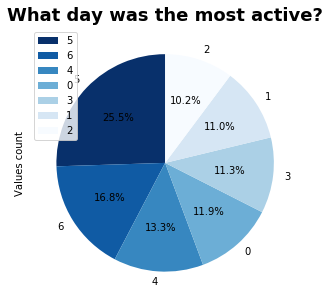

In [8]:
popular_days = pensActivity['created'].groupby(pensActivity.created.dt.weekday).agg('count').sort_values(ascending=False)

plt.figure(figsize=(8,5))
popular_days.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues_r')
plt.title('What day was the most active?', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()
# plt.savefig('daily_activity.png', dpi=300)

In [18]:
popular_days.nlargest()

created
5    198155
6    180288
4    116453
0    106043
3    100788
Name: created, dtype: int64

## zooming into particular time
### London September 2016

In [4]:
#Zooming into London 2016
start_date = '2016-09-07'
end_date = '2016-09-27'
mask = (pensActivity['created'] > start_date) & (pensActivity['created'] <= end_date)
london = pensActivity.loc[mask]
london

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
374175,108526169,1523495,6b5137bf96f57f7c56a63f4203247c480daa241f,"{""collection"":[{""record_data"":""chsdm:o:1818783...",NaN,1,2016-09-07 14:15:43,2016-09-07 14:15:43,291,11
375803,108526155,1522505,6bc99ea1f2c1abda2cf85553d1ba3848b8d8ed40,"{""collection"":[{""record_data"":""chsdm:o:1813578...",NaN,1,2016-09-07 14:22:42,2016-09-07 14:22:42,49,1
167157,108498969,1520471,2ff611f3aec24d63bc99739657c03435458035ca,"{""pen_uid"":""55db816f23000700"",""initial_time_st...",NaN,1,2016-09-07 14:32:44,2016-09-07 14:32:47,2305,74
100183,108526151,1519965,1cbcfe136a59d7b28032637d7ee2b4deb4d10854,"{""pen_uid"":""55db816f15002600"",""initial_time_st...",NaN,1,2016-09-07 14:34:20,2016-09-07 14:34:20,198,5
222159,108526161,1521991,3fbf3a8d8ff60ba2c8916eae0cc2f11102900b93,"{""collection"":[{""record_data"":""chsdm:o:6911720...",NaN,1,2016-09-07 14:42:49,2016-09-07 14:42:49,140,4
...,...,...,...,...,...,...,...,...,...,...
823679,109030079,1520083,ec5c954eb67aecc2ed61c8aaa3df06a899f5a241,"{""pen_uid"":""55db816f17001700"",""initial_time_st...",NaN,1,2016-09-26 21:41:47,2016-09-26 21:41:48,473,14
780147,109031137,1520225,dfe26fb926e730ce6b8dc9ca721f4543e5e9706c,"{""pen_uid"":""55db816f1f000d00"",""initial_time_st...",NaN,1,2016-09-26 21:41:52,2016-09-26 21:41:52,116,3
770912,109030667,1520117,dd4771126e6f8b22e45a0386d8dc605746e1aae1,"{""pen_uid"":""55db816f1a000700"",""initial_time_st...",NaN,1,2016-09-26 21:47:57,2016-09-26 21:47:57,378,6
481279,109030671,1523455,8a2df1384c569c7d253a731778a3a6f1fe5323a3,"{""pen_uid"":""595f836f20002700"",""initial_time_st...",NaN,1,2016-09-26 21:48:02,2016-09-26 21:48:02,57,3


In [5]:
london.count()

visit_id           13027
pen_id             13027
fingerprint        13027
activity           13027
notes                  0
status_id          13027
created            13027
lastmodified       13027
time_to_process    13027
count_items        13027
dtype: int64

In [7]:
london['count_items'].sum()

261576

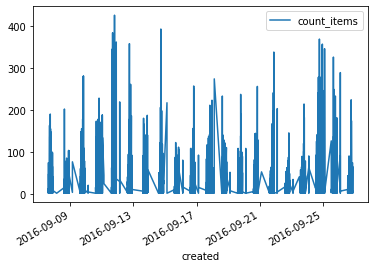

In [6]:
london.plot(x='created', y='count_items')

### Adam's timeframe (January-July 2019)

In [22]:
#zooming to Adam timeframe 
start_date = '01-01-2019'
end_date = '07-31-2019'
mask = (pensActivity['created'] > start_date) & (pensActivity['created'] <= end_date)
sevenMonths = pensActivity.loc[mask]
sevenMonths

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
275984,126517331,1520347,4f3b1cd4cb190b8e2c636e292b99738788cc8135,"{""pen_uid"":""55db816f20002700"",""initial_time_st...",NaN,1,2019-01-01 03:00:06,2019-01-01 03:00:06,126,9
256494,126524581,1520747,499e12bbcb2e2ad78624d146e685e3b3a0281fc5,"{""pen_uid"":""585f836f01001600"",""initial_time_st...",NaN,1,2019-01-01 03:00:06,2019-01-01 03:00:06,203,4
148321,126525141,1522483,2a9a15fcebc4479f626078ef5aac3a8cf46b3a00,"{""pen_uid"":""595f836f0e000e00"",""initial_time_st...",NaN,1,2019-01-01 03:00:06,2019-01-01 03:00:06,80,1
678347,126525111,1524367,c2baae1b9f0c0f1bc0ae714918f0cc45bc309b15,"{""pen_uid"":""90ff826f01001300"",""initial_time_st...",NaN,1,2019-01-01 03:00:07,2019-01-01 03:00:09,1292,41
767242,126520961,1523411,dc435a2fdd5bea8fe9417ef3877108333a9b03a4,"{""pen_uid"":""595f836f20000100"",""initial_time_st...",NaN,1,2019-01-01 03:00:07,2019-01-01 03:00:07,328,8
...,...,...,...,...,...,...,...,...,...,...
85425,129003719,1522207,1882b81f30ee3cfc322f8c285f539b33250086d2,"{""pen_uid"":""595f836f03001300"",""initial_time_st...",NaN,1,2019-07-30 21:46:56,2019-07-30 21:46:57,565,15
317724,129003621,1522129,5b26c926d5cc77a3cc3f5d7db11dbe4f1879be67,"{""pen_uid"":""585f836f2d001c00"",""initial_time_st...",NaN,1,2019-07-30 21:48:04,2019-07-30 21:48:05,1204,40
111957,129005869,1525267,2015028f67014de87ba4fbbbf5fd03e3ebf9f384,"{""pen_uid"":""91ff826f0e002600"",""initial_time_st...",NaN,1,2019-07-30 21:50:29,2019-07-30 21:50:29,1036,32
281455,129005865,1524337,50cd8426614cb3fa964c8f6c56bd21dc15f917f8,"{""pen_uid"":""595f836f31001900"",""initial_time_st...",NaN,1,2019-07-30 21:50:49,2019-07-30 21:50:49,399,20


In [23]:
sevenMonths.count()
# in between adam timeframe 52,259 activities were registered

visit_id           52259
pen_id             52259
fingerprint        52259
activity           52259
notes                  0
status_id          52259
created            52259
lastmodified       52259
time_to_process    52259
count_items        52259
dtype: int64

## total collected items

In [26]:
pensActivity['count_items'].sum()

22004718

In [28]:
less_items_count_per_visit = pensActivity[pensActivity['count_items'] < 200]
less_items_count_per_visit['count_items'].sum()
#more that 200 items per visit is a bit fishy

19427182

In [9]:
pensActivity_openinghours['count_items'].sum()

19486350

## how many checkout a pen but didn't collected anything? 

In [49]:
(pensActivity['count_items'] > 0).value_counts()

True     892208
False         5
Name: count_items, dtype: int64

In [63]:
zero_collects = pensActivity[pensActivity['count_items'] == 0]
zero_collects
#only 2 visits didn't collected any items! 

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
728571,1586155,1510709,d136cf668c7d30220c56220818d6c3cd3ae5bf44,"{""collection"":[{""record_data"":""chsdm:o:1848743...",NaN,1,2015-02-25 23:34:41,2015-02-25 23:38:41,0,0
618279,1586155,1510709,b196efb49e09547b258ee5401221bbe0ceec4d21,"{""collection"":[{""record_data"":""chsdm:o:1848743...",NaN,1,2015-02-25 23:35:11,2015-02-25 23:39:41,0,0
43342,1586155,1510709,0c65807bb86a60b203102aed366afb7112ce2954,"{""collection"":[{""record_data"":""chsdm:o:1848743...",NaN,1,2015-02-25 23:35:39,2015-02-25 23:39:45,0,0
419312,1586155,1510709,7851ee774edc072f3d664fb4e8a70c6d31f46d37,"{""collection"":[{""record_data"":""chsdm:o:1848743...",NaN,1,2015-02-25 23:36:03,2015-02-25 23:40:13,0,0
178540,2749023,1523885,333b55aaf8d1c45eacabc8ec896e72e7ef36a488,,NaN,1,2015-03-07 21:16:32,2015-03-07 21:16:32,0,0


In [58]:
zero_collects[~zero_collects['visit_id'].duplicated()]

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
728571,1586155,1510709,d136cf668c7d30220c56220818d6c3cd3ae5bf44,"{""collection"":[{""record_data"":""chsdm:o:1848743...",NaN,1,2015-02-25 23:34:41,2015-02-25 23:38:41,0,0
178540,2749023,1523885,333b55aaf8d1c45eacabc8ec896e72e7ef36a488,,NaN,1,2015-03-07 21:16:32,2015-03-07 21:16:32,0,0


In [75]:
percentage_count_items = pensActivity['count_items'].value_counts()/pensActivity['count_items'].count()*100
percentage_count_items.sort_index()

0       0.000560
1       8.537872
2       6.066264
3       5.192034
4       5.030525
          ...   
943     0.000112
1066    0.000112
1082    0.000112
1183    0.000112
1235    0.000112
Name: count_items, Length: 673, dtype: float64

Text(0, 0.5, 'percentage')

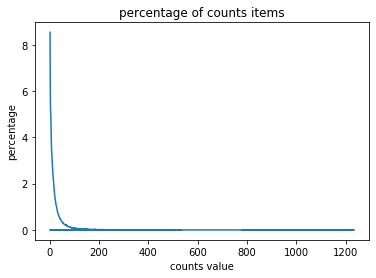

In [69]:
percentage_count_items.plot(title='percentage of counts items')
plt.xlabel('counts value')
plt.ylabel('percentage')

In [71]:
pensActivity['count_items'].nlargest(10)

212891    1235
344757    1183
700658    1082
418459    1066
265091     943
417713     911
105805     872
382639     859
768639     851
642377     830
Name: count_items, dtype: int64

In [78]:
pensActivity['count_items'].median()
#i cannot trust the average since the higher adges throw this calculation. Median gives sane number. 

12.0

## count_items per visit

In [83]:
group_visit_group= pensActivity.groupby(['visit_id']).agg('sum')
group_visit_group.reset_index(inplace=True)
group_visit_count = group_visit_group[['visit_id', 'count_items']]
group_visit_count.sort_values(by="count_items", ascending=False, inplace=True)
group_visit_count
# #the numbers are weird (did the same visit really collected so much or are those test visits?)

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,visit_id,count_items
71,1526919,28308
208957,107715189,6170
146410,99037581,5966
133295,97337717,4952
182878,103862781,4783
...,...,...
307052,115306707,1
307017,115303879,1
307009,115303675,1
528817,132806735,1


In [86]:
group_visit_count.median()
#if we group the visit id - so median count_item per visit is 16

visit_id       111746249.0
count_items           16.0
dtype: float64

## the most used pens

In [90]:
pensActivity['pen_id'].value_counts()

1521687    1480
1525511    1288
1523121    1184
1521555    1107
1519959    1104
           ... 
1526873       1
1520715       1
1523419       1
1523925       1
0             1
Name: pen_id, Length: 3010, dtype: int64

In [91]:
pensActivity.groupby('pen_id').size().nlargest(10)

pen_id
1521687    1480
1525511    1288
1523121    1184
1521555    1107
1519959    1104
1523605    1093
1520277    1048
1521201    1020
1520023     987
1521525     969
dtype: int64

In [92]:
by_items = pensActivity[['pen_id', 'count_items']]
by_items.sort_values(by='count_items', ascending =False).head(10)

,pen_id,count_items
212891,1526757,1235
344757,1519901,1183
700658,1522701,1082
418459,1526757,1066
265091,1522701,943
417713,1520305,911
105805,1522193,872
382639,1523891,859
768639,1523523,851
642377,1522291,830


In [39]:
by_items[by_items['pen_id'] == 1522701]

,pen_id,count_items
640417,1522701,10
453823,1522701,33
770067,1522701,28
33212,1522701,28
672294,1522701,25
...,...,...
258535,1522701,144
427615,1522701,21
738468,1522701,3
97948,1522701,50


In [98]:
group_id = by_items.groupby(['pen_id'])
sort_by_count = group_id.describe()
# sort_by_count = sort_by_count['count_items', 'count']
sort_by_count

count_items                                                     
              count       mean        std  min   25%   50%    75%    max
pen_id                                                                  
0               1.0   2.000000        NaN  2.0  2.00   2.0   2.00    2.0
3               1.0   1.000000        NaN  1.0  1.00   1.0   1.00    1.0
5               1.0   2.000000        NaN  2.0  2.00   2.0   2.00    2.0
8               1.0   1.000000        NaN  1.0  1.00   1.0   1.00    1.0
10              2.0   4.500000   2.121320  3.0  3.75   4.5   5.25    6.0
...             ...        ...        ...  ...   ...   ...    ...    ...
3860045       267.0  21.805243  31.795509  1.0  4.50  11.0  25.00  235.0
3860047       180.0  29.933333  41.298694  1.0  5.00  16.0  33.00  255.0
3860067       629.0  21.637520  33.817686  1.0  4.00  10.0  25.00  335.0
3860071       185.0  24.454054  34.382903  1.0  7.00  15.0  28.00  267.0
3860073       168.0  25.577381  28.415121  1.0  6.00  14.0  33.00  128.0

[3010 rows x 8 columns]

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 <a list of 11 Text xticklabel objects>)

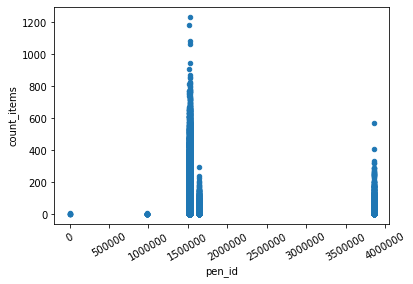

In [104]:
plt.rcParams['agg.path.chunksize'] = 40000
by_items.plot(x='pen_id', y='count_items', kind='scatter')
plt.xticks(rotation=30)

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 <a list of 11 Text xticklabel objects>)

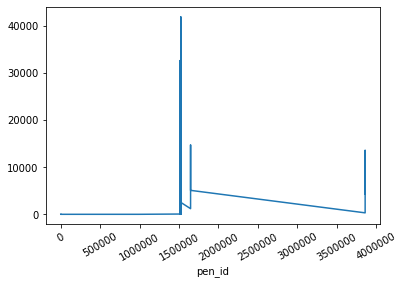

In [106]:
sum_per_pen = by_items.groupby(["pen_id"]).count_items.sum()
sum_per_pen.plot()
plt.xticks(rotation=30)
#what are these pens that collected huge amount of items compare to the others?

In [141]:
sum_per_visit = pensActivity.groupby(["visit_id"]).count_items.sum()
sum_per_visit

visit_id
0             2
904949       64
1049087      16
1050651      20
1050661       4
             ..
132777683     1
132794701     1
132806719     1
132806727     1
132806735     1
Name: count_items, Length: 528818, dtype: int64

In [108]:
pensActivity[pensActivity['count_items'] < 500]
#more the 500 items per visit is fishy

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 15:32:19,2014-12-15 15:32:19,0,2
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,"{""pen_uid"":""91ff826f0b001e00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:52:19,2014-12-15 15:52:19,0,7
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",Insufficient permissions for object at index 3,0,2014-12-15 15:56:09,2014-12-15 15:56:09,0,5
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6
...,...,...,...,...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,"{""ticket_id"":""tzctj"",""registers"":""None"",""colle...",NaN,1,2020-07-02 20:22:39,2020-07-02 20:22:39,161,1
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,"{""ticket_id"":""gz65"",""registers"":""None"",""collec...",NaN,1,2020-07-06 17:42:37,2020-07-06 17:42:37,159,1
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,"{""ticket_id"":""56bs6"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:12:38,2020-07-09 13:12:38,172,1
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,"{""ticket_id"":""cvszd"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:16:52,2020-07-09 13:16:52,122,1


## How many items were collected per month

In [111]:
freq_count = pensActivity.groupby(["visit_id"]).count_items.sum()
freq_count = freq_count.to_frame()

freq_count

,count_items
visit_id,
0,2
904949,64
1049087,16
1050651,20
1050661,4
...,...
132777683,1
132794701,1
132806719,1


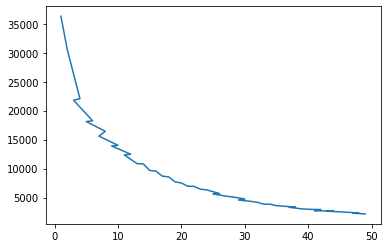

In [117]:
less_fifthy_items = freq_count[freq_count['count_items'] < 50]
more_than_zero = less_fifthy_items[less_fifthy_items['count_items'] > 0]
more_than_zero['count_items'].value_counts().plot()
# sharp dropoff between 0-5, most visits collected 0 
# the range between 10-40 is also pretty active
#this fits to the graph above.. 

In [211]:
items_by_date = pensActivity[['count_items', 'created']]
items_by_date
# items_by_date['created'].groupby(items_by_date.created.dt.to_period("M")).agg('count')

,count_items,created
131729,2,2014-12-15 15:32:19
628374,7,2014-12-15 15:52:19
473963,5,2014-12-15 15:56:09
771570,6,2014-12-15 15:56:30
760275,6,2014-12-15 15:58:11
...,...,...
494124,1,2020-07-02 20:22:39
676664,1,2020-07-06 17:42:37
283113,1,2020-07-09 13:12:38
595596,1,2020-07-09 13:16:52


In [4]:
plt.rcParams['agg.path.chunksize'] = 40000

items_by_date = pensActivity[['count_items', 'created']]
per_month = items_by_date.created.dt.to_period("M")
month_count = items_by_date.groupby(per_month).sum()
month_count['count_items'].sum()
# month_count['count_items'].sum()
#This is a good way to group by date to look for count

month_count.sort_values(by='count_items', ascending=False)

,count_items
created,
2016-07,1361480
2016-08,1031058
2016-04,1021788
2016-03,899925
2016-05,884831
...,...
2014-12,626
2015-01,163
2020-04,10


Text(0, 0.5, 'count items')

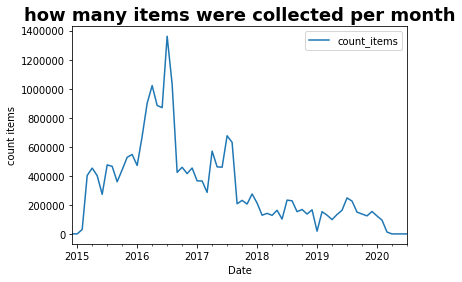

In [5]:
month_count.plot()
plt.title('how many items were collected per month', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.xlabel('Date')
plt.ylabel('count items')
# plt.savefig('monthly_item_collect.png', dpi=300)

In [7]:
per_year = items_by_date.created.dt.to_period("Y")
year_count = items_by_date.groupby(per_year).sum()
year_count

,count_items
created,
2014,626
2015,4377035
2016,8964669
2017,4733740
2018,1961112
2019,1736190
2020,231346


Text(0, 0.5, 'count items')

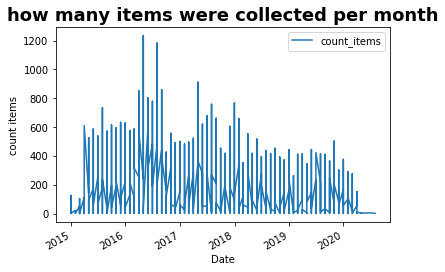

In [142]:
# freq_count_by_date = items_by_date.groupby(['count_items', pd.Grouper(key='created', freq='M')]).agg('sum')

# freq_count_by_date.sort_index()
# freq_count_by_date.reset_index().plot(x='created', y='count_items')
# plt.title('how many items were collected per month', fontdict={'fontweight': 'bold', 'fontsize':18})
# plt.xlabel('Date')
# plt.ylabel('count items')
# plt.savefig('monthly_item_collect.png', dpi=300)

#### count items in adam timeframe

In [129]:
#zooming to Adam timeframe 
start_date = '01-01-2019'
end_date = '07-31-2019'
mask = (pensActivity['created'] > start_date) & (pensActivity['created'] <= end_date)
sevenMonths = pensActivity.loc[mask]
count_seven_freg = sevenMonths.groupby(["visit_id"]).count_items.sum()
count_seven_freg = count_seven_freg.to_frame()

less_items = count_seven_freg[count_seven_freg['count_items'] < 100]

less_items['count_items'].sum()

617821

## Activity column

In [130]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 1000)
pensActivity['activity'].iloc[0]

'{"collection":[{"record_id":1,"record_data":"chsdm:o:18500983","record_len":16,"timestamp":"00:00:04"},{"record_id":1,"record_data":"chsdm:o:18305299","record_len":16,"timestamp":"00:00:07"}],"registers":{"vibra_on":1,"tag_counter_after_low_battery_level_reached":0,"p2p_life_counter":378,"tag_life_counter":29,"pen_id":"NaN","vibra_duration":115973,"company":"0x0","tag_counter_before_low_battery_level_reached":29,"nfc_loops":16,"p2p_test_normal_mode":1,"low_battery_level_reached_since_last_reset":0,"p2p_counter_after_low_battery_level_reached":0,"p2p_counter_before_low_battery_level_reached":378},"ticket_id":"20141215u3","pen_id":"5","initial_time_stamp":"2014-12-15T15:33:19"}'

In [131]:
activity_parse = pensActivity['activity']

In [132]:
def parse(string):
    if string is None:
        return {}
    else:
        try:
            return json.loads(string)
        except ValueError:
            print(string)
            return {}
        
    
json_str = activity_parse.map(parse)

{"collection":[{"record_data":"chsdm:o:18487435","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18638637","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18615569","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18353745","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18562521","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:35460793","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18400931","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18471355","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18667891","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18758367","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18471361","record_id":1,"record_len":"16","timestamp":"18:34:

{"collection":[{"record_data":"chsdm:v:69166469","record_id":0,"record_len":"16","timestamp":"00:48:10"},{"record_data":"chsdm:o:18758389","record_id":1,"record_len":"16","timestamp":"00:48:26"},{"record_data":"chsdm:o:18733333","record_id":2,"record_len":"16","timestamp":"00:48:42"},{"record_data":"chsdm:o:69153301","record_id":3,"record_len":"16","timestamp":"00:48:48"},{"record_data":"chsdm:o:18631613","record_id":4,"record_len":"16","timestamp":"00:48:51"},{"record_data":"chsdm:o:18630461","record_id":5,"record_len":"16","timestamp":"00:48:53"},{"record_data":"chsdm:o:18630459","record_id":6,"record_len":"16","timestamp":"00:48:53"},{"record_data":"chsdm:o:18630457","record_id":7,"record_len":"16","timestamp":"00:48:53"},{"record_data":"chsdm:o:18630455","record_id":8,"record_len":"16","timestamp":"00:48:53"},{"record_data":"chsdm:o:69153299","record_id":9,"record_len":"16","timestamp":"00:48:56"},{"record_data":"chsdm:o:69153301","record_id":10,"record_len":"16","timestamp":"00:48

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"00:00:32"},{"record_data":"chsdm:o:69155057","record_id":1,"record_len":"16","timestamp":"00:01:31"},{"record_data":"chsdm:o:69155275","record_id":2,"record_len":"16","timestamp":"00:01:49"},{"record_data":"chsdm:o:69155275","record_id":3,"record_len":"16","timestamp":"00:02:08"},{"record_data":"chsdm:o:69155331","record_id":4,"record_len":"16","timestamp":"00:03:50"},{"record_data":"chsdm:o:69155065","record_id":5,"record_len":"16","timestamp":"00:04:03"},{"record_data":"chsdm:o:69155063","record_id":6,"record_len":"16","timestamp":"00:04:03"},{"record_data":"chsdm:o:69155003","record_id":7,"record_len":"16","timestamp":"00:04:03"},{"record_data":"chsdm:o:69155333","record_id":8,"record_len":"16","timestamp":"00:04:29"},{"record_data":"chsdm:o:69155339","record_id":9,"record_len":"16","timestamp":"00:04:52"},{"record_data":"chsdm:o:69155337","record_id":10,"record_len":"16","timestamp":"00:04

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"00:01:34"},{"record_data":"chsdm:o:69155335","record_id":1,"record_len":"16","timestamp":"00:01:38"},{"record_data":"chsdm:o:18383473","record_id":2,"record_len":"16","timestamp":"00:06:18"},{"record_data":"chsdm:o:18489265","record_id":3,"record_len":"16","timestamp":"00:06:20"},{"record_data":"chsdm:o:18659073","record_id":4,"record_len":"16","timestamp":"00:06:22"},{"record_data":"chsdm:o:18184945","record_id":5,"record_len":"16","timestamp":"00:06:23"},{"record_data":"chsdm:o:18468071","record_id":6,"record_len":"16","timestamp":"00:06:25"},{"record_data":"chsdm:o:18135781","record_id":7,"record_len":"16","timestamp":"00:06:27"},{"record_data":"chsdm:o:18327301","record_id":8,"record_len":"16","timestamp":"00:06:29"},{"record_data":"chsdm:o:18168763","record_id":9,"record_len":"16","timestamp":"00:06:32"},{"record_data":"chsdm:o:18489265","record_id":10,"record_len":"16","timestamp":"00:06

{"collection":[{"record_data":"chsdm:o:219777433","record_id":0,"record_len":"17","timestamp":"00:50:51"},{"record_data":"chsdm:o:136252991","record_id":1,"record_len":"17","timestamp":"00:50:51"},{"record_data":"chsdm:o:219777431","record_id":2,"record_len":"17","timestamp":"00:50:51"},{"record_data":"chsdm:o:219777427","record_id":3,"record_len":"17","timestamp":"00:50:51"},{"record_data":"chsdm:o:18624741","record_id":4,"record_len":"16","timestamp":"00:51:38"},{"record_data":"chsdm:o:18636273","record_id":5,"record_len":"16","timestamp":"00:51:40"},{"record_data":"chsdm:o:18468069","record_id":6,"record_len":"16","timestamp":"00:51:42"},{"record_data":"chsdm:o:18670471","record_id":7,"record_len":"16","timestamp":"00:51:53"},{"record_data":"chsdm:o:18732761","record_id":8,"record_len":"16","timestamp":"00:51:54"},{"record_data":"chsdm:o:18636375","record_id":9,"record_len":"16","timestamp":"00:51:56"},{"record_data":"chsdm:o:136253113","record_id":10,"record_len":"17","timestamp":"

{"collection":[{"record_data":"chsdm:o:69155387","record_id":0,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155385","record_id":1,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155399","record_id":2,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155391","record_id":3,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155389","record_id":4,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155405","record_id":5,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155381","record_id":6,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155395","record_id":7,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155403","record_id":8,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155383","record_id":9,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155401","record_id":10,"record_len":"16","timestamp":"00:08

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"00:00:58"},{"record_data":"chsdm:o:18539583","record_id":1,"record_len":"16","timestamp":"00:02:39"},{"record_data":"chsdm:o:18459937","record_id":2,"record_len":"16","timestamp":"00:02:44"},{"record_data":"chsdm:o:18423571","record_id":3,"record_len":"16","timestamp":"00:02:49"},{"record_data":"chsdm:o:68250939","record_id":4,"record_len":"16","timestamp":"00:02:53"},{"record_data":"chsdm:o:18660393","record_id":5,"record_len":"16","timestamp":"00:03:05"},{"record_data":"chsdm:o:420565351","record_id":6,"record_len":"17","timestamp":"00:03:11"},{"record_data":"chsdm:o:420564073","record_id":7,"record_len":"17","timestamp":"00:03:11"},{"record_data":"chsdm:o:420564063","record_id":8,"record_len":"17","timestamp":"00:03:11"},{"record_data":"chsdm:o:420564061","record_id":9,"record_len":"17","timestamp":"00:03:11"},{"record_data":"chsdm:o:420564057","record_id":10,"record_len":"17","timestamp":"

{"collection":[{"record_data":"chsdm:o:102147229","record_id":0,"record_len":"17","timestamp":"00:09:07"},{"record_data":"chsdm:o:135726729","record_id":1,"record_len":"17","timestamp":"00:09:10"},{"record_data":"chsdm:o:135726733","record_id":2,"record_len":"17","timestamp":"00:09:13"},{"record_data":"chsdm:o:135726735","record_id":3,"record_len":"17","timestamp":"00:09:15"},{"record_data":"chsdm:o:135726743","record_id":4,"record_len":"17","timestamp":"00:09:17"},{"record_data":"chsdm:o:135726737","record_id":5,"record_len":"17","timestamp":"00:09:18"},{"record_data":"chsdm:o:135726731","record_id":6,"record_len":"17","timestamp":"00:09:21"},{"record_data":"chsdm:o:135726761","record_id":7,"record_len":"17","timestamp":"00:09:29"},{"record_data":"chsdm:o:135726757","record_id":8,"record_len":"17","timestamp":"00:09:29"},{"record_data":"chsdm:o:136252489","record_id":9,"record_len":"17","timestamp":"00:09:36"},{"record_data":"chsdm:o:136252483","record_id":10,"record_len":"17","timest

{"collection":[{"record_data":"chsdm:o:136252489","record_id":0,"record_len":"17","timestamp":"00:20:12"},{"record_data":"chsdm:o:136252483","record_id":1,"record_len":"17","timestamp":"00:20:12"},{"record_data":"chsdm:o:219777349","record_id":2,"record_len":"17","timestamp":"00:20:12"},{"record_data":"chsdm:o:136252623","record_id":3,"record_len":"17","timestamp":"00:20:12"},{"record_data":"chsdm:o:136252489","record_id":4,"record_len":"17","timestamp":"00:20:16"},{"record_data":"chsdm:o:136252483","record_id":5,"record_len":"17","timestamp":"00:20:16"},{"record_data":"chsdm:o:219777349","record_id":6,"record_len":"17","timestamp":"00:20:16"},{"record_data":"chsdm:o:136252623","record_id":7,"record_len":"17","timestamp":"00:20:16"},{"record_data":"chsdm:o:219777441","record_id":8,"record_len":"17","timestamp":"00:21:05"},{"record_data":"chsdm:o:219777443","record_id":9,"record_len":"17","timestamp":"00:21:05"},{"record_data":"chsdm:o:219777439","record_id":10,"record_len":"17","timest

{"collection":[{"record_data":"chsdm:o:69155193","record_id":0,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155191","record_id":1,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155189","record_id":2,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155187","record_id":3,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155183","record_id":4,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155185","record_id":5,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155179","record_id":6,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155171","record_id":7,"record_len":"16","timestamp":"00:06:16"},{"record_data":"chsdm:o:69155169","record_id":8,"record_len":"16","timestamp":"00:06:16"},{"record_data":"chsdm:o:69155167","record_id":9,"record_len":"16","timestamp":"00:06:16"},{"record_data":"chsdm:o:102199993","record_id":10,"record_len":"17","timestamp":"00:0

{"collection":[{"record_data":"chsdm:o:18184945","record_id":0,"record_len":"16","timestamp":"00:01:45"},{"record_data":"chsdm:o:18659073","record_id":1,"record_len":"16","timestamp":"00:01:47"},{"record_data":"chsdm:o:18489265","record_id":2,"record_len":"16","timestamp":"00:01:49"},{"record_data":"chsdm:o:18383473","record_id":3,"record_len":"16","timestamp":"00:01:51"},{"record_data":"chsdm:o:18383475","record_id":4,"record_len":"16","timestamp":"00:01:53"},{"record_data":"chsdm:o:18464653","record_id":5,"record_len":"16","timestamp":"00:01:55"},{"record_data":"chsdm:o:420565351","record_id":6,"record_len":"17","timestamp":"00:01:57"},{"record_data":"chsdm:o:420564073","record_id":7,"record_len":"17","timestamp":"00:01:57"},{"record_data":"chsdm:o:420564063","record_id":8,"record_len":"17","timestamp":"00:01:57"},{"record_data":"chsdm:o:420564061","record_id":9,"record_len":"17","timestamp":"00:01:57"},{"record_data":"chsdm:o:420564057","record_id":10,"record_len":"17","timestamp":"

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"01:58:24"},{"record_data":"chsdm:o:69155335","record_id":1,"record_len":"16","timestamp":"01:58:31"},{"record_data":"chsdm:o:69155335","record_id":2,"record_len":"16","timestamp":"01:58:32"},{"record_data":"chsdm:o:69155335","record_id":3,"record_len":"16","timestamp":"01:58:34"},{"record_data":"chsdm:o:69155335","record_id":4,"record_len":"16","timestamp":"01:58:35"},{"record_data":"chsdm:o:69155335","record_id":5,"record_len":"16","timestamp":"01:58:50"},{"record_data":"chsdm:o:69155335","record_id":6,"record_len":"16","timestamp":"01:58:52"},{"record_data":"chsdm:o:69155335","record_id":7,"record_len":"16","timestamp":"01:58:53"},{"record_data":"chsdm:o:69155335","record_id":8,"record_len":"16","timestamp":"01:58:59"},{"record_data":"chsdm:o:69155335","record_id":9,"record_len":"16","timestamp":"01:59:08"},{"record_data":"chsdm:o:69155335","record_id":10,"record_len":"16","timestamp":"01:59

{"collection":[{"record_data":"chsdm:o:404584055","record_id":0,"record_len":"17","timestamp":"03:25:22"},{"record_data":"chsdm:o:404584057","record_id":1,"record_len":"17","timestamp":"03:25:22"},{"record_data":"chsdm:o:69155071","record_id":2,"record_len":"16","timestamp":"03:25:22"},{"record_data":"chsdm:o:69155387","record_id":3,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155385","record_id":4,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155399","record_id":5,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155391","record_id":6,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155389","record_id":7,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155405","record_id":8,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155381","record_id":9,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155395","record_id":10,"record_len":"16","timestamp":"03:

{"collection":[{"record_data":"chsdm:o:18187831","record_id":0,"record_len":"16","timestamp":"00:00:32"},{"record_data":"chsdm:o::o:404529349","record_id":1,"record_len":"20","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529351","record_id":2,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529347","record_id":3,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529339","record_id":4,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529343","record_id":5,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529341","record_id":6,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529337","record_id":7,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529333","record_id":8,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529335","record_id":9,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529331","record_id":10,"record_len":"17","time

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"01:01:25"},{"record_data":"chsdm:o:69155377","record_id":1,"record_len":"16","timestamp":"01:02:27"},{"record_data":"chsdm:o:404584055","record_id":2,"record_len":"17","timestamp":"01:03:01"},{"record_data":"chsdm:o:404584057","record_id":3,"record_len":"17","timestamp":"01:03:01"},{"record_data":"chsdm:o:69155071","record_id":4,"record_len":"16","timestamp":"01:03:01"},{"record_data":"chsdm:o:69155387","record_id":5,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155385","record_id":6,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155399","record_id":7,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155391","record_id":8,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155389","record_id":9,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155405","record_id":10,"record_len":"16","timestamp":"01:

{"collection":[{"record_data":"chsdm:o:18378445","record_id":0,"record_len":"16","timestamp":"00:00:45"},{"record_data":"chsdm:o:18409533","record_id":1,"record_len":"16","timestamp":"00:00:48"},{"record_data":"chsdm:o:18575325","record_id":2,"record_len":"16","timestamp":"00:01:00"},{"record_data":"chsdm:o:18572345","record_id":3,"record_len":"16","timestamp":"00:01:03"},{"record_data":"chsdm:o:18572227","record_id":4,"record_len":"16","timestamp":"00:01:04"},{"record_data":"chsdm:o:18381973","record_id":5,"record_len":"16","timestamp":"00:01:08"},{"record_data":"chsdm:o:18539627","record_id":6,"record_len":"16","timestamp":"00:01:17"},{"record_data":"chsdm:o:69143665","record_id":7,"record_len":"16","timestamp":"00:01:18"},{"record_data":"chsdm:o:404527623","record_id":8,"record_len":"17","timestamp":"00:01:21"},{"record_data":"chsdm:o:18378443","record_id":9,"record_len":"16","timestamp":"00:01:28"},{"record_data":"chsdm:o:18378441","record_id":10,"record_len":"16","timestamp":"00:0

{"collection":[{"record_data":"chsdm:o:69155013","record_id":0,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155009","record_id":1,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155007","record_id":2,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69154997","record_id":3,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69154999","record_id":4,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155005","record_id":5,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155017","record_id":6,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155015","record_id":7,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155011","record_id":8,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155057","record_id":9,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:102335191","record_id":10,"record_len":"17","timestamp":"06:1

{"collection":[{"record_data":"chsdm:o:907131605","record_id":0,"record_len":"17","timestamp":"00:57:43"},{"record_data":"chsdm:o:907214293","record_id":1,"record_len":"17","timestamp":"00:57:47"},{"record_data":"chsdm:o:18343959","record_id":2,"record_len":"16","timestamp":"00:57:49"},{"record_data":"chsdm:o:907130359","record_id":3,"record_len":"17","timestamp":"00:57:51"},{"record_data":"chsdm:o:404536641","record_id":4,"record_len":"17","timestamp":"00:57:55"},{"record_data":"chsdm:o:18353701","record_id":5,"record_len":"16","timestamp":"00:57:57"},{"record_data":"chsdm:o:908038735","record_id":6,"record_len":"17","timestamp":"00:58:03"},{"record_data":"chsdm:o:907130253","record_id":7,"record_len":"17","timestamp":"00:58:06"},{"record_data":"chsdm:o:35521009","record_id":8,"record_len":"16","timestamp":"00:58:08"},{"record_data":"chsdm:o:404536663","record_id":9,"record_len":"17","timestamp":"00:58:11"},{"record_data":"chsdm:o:18794697","record_id":10,"record_len":"16","timestamp"

{"collection":[{"record_data":"chsdm:o:18187831","record_id":0,"record_len":"16","timestamp":"00:01:50"},{"record_data":"chsdm:o:907130101","record_id":1,"record_len":"17","timestamp":"00:07:03"},{"record_data":"chsdm:o:18312593","record_id":2,"record_len":"16","timestamp":"00:07:08"},{"record_data":"chsdm:o:18574871","record_id":3,"record_len":"16","timestamp":"00:07:12"},{"record_data":"chsdm:o:18574871","record_id":4,"record_len":"16","timestamp":"00:07:55"},{"record_data":"chsdm:o:907214171","record_id":5,"record_len":"17","timestamp":"00:08:04"},{"record_data":"chsdm:o:907214199","record_id":6,"record_len":"17","timestamp":"00:08:06"},{"record_data":"chsdm:o:907130393","record_id":7,"record_len":"17","timestamp":"00:08:18"},{"record_data":"chsdm:o:907130427","record_id":8,"record_len":"17","timestamp":"00:08:20"},{"record_data":"chsdm:o:907214249","record_id":9,"record_len":"17","timestamp":"00:08:23"},{"record_data":"chsdm:o:907214133","record_id":10,"record_len":"17","timestamp"

{"collection":[{"record_data":"chsdm:o:1108723777","record_id":0,"record_len":"18","timestamp":"00:03:09"},{"record_data":"chsdm:o:68813711","record_id":1,"record_len":"16","timestamp":"00:03:09"},{"record_data":"chsdm:o:1108723777","record_id":2,"record_len":"18","timestamp":"00:03:18"},{"record_data":"chsdm:o:68813711","record_id":3,"record_len":"16","timestamp":"00:03:18"},{"record_data":"chsdm:o:1108723777","record_id":4,"record_len":"18","timestamp":"00:03:55"},{"record_data":"chsdm:o:68813711","record_id":5,"record_len":"16","timestamp":"00:03:55"},{"record_data":"chsdm:o:1108723781","record_id":6,"record_len":"18","timestamp":"00:04:17"},{"record_data":"chsdm:o:404577379","record_id":7,"record_len":"17","timestamp":"00:04:17"},{"record_data":"chsdm:o:907130463","record_id":8,"record_len":"17","timestamp":"00:04:25"},{"record_data":"chsdm:o:1108723791","record_id":9,"record_len":"18","timestamp":"00:04:25"},{"record_data":"chsdm:o:890290247","record_id":10,"record_len":"17","time

{"collection":[{"record_id":1,"record_data":"chsdm:o:1108750399","record_length":18,"timestamp":"01:26:01"},{"record_id":2,"record_data":"chsdm:o:18651137","record_length":16,"timestamp":"01:26:41"},{"record_id":3,"record_data":"chsdm:o:18651119","record_length":16,"timestamp":"01:26:43"},{"record_id":4,"record_data":"chsdm:o:18669115","record_length":16,"timestamp":"01:26:46"},{"record_id":5,"record_data":"chsdm:o:18768149","record_length":16,"timestamp":"01:26:48"},{"record_id":6,"record_data":"chsdm:o:18768143","record_length":16,"timestamp":"01:26:48"},{"record_id":7,"record_data":"chsdm:o:18495073","record_length":16,"timestamp":"01:26:57"},{"record_id":8,"record_data":"chsdm:o:18319945","record_length":16,"timestamp":"01:26:59"},{"record_id":9,"record_data":"chsdm:o:1108754281","record_length":18,"timestamp":"01:27:01"},{"record_id":10,"record_data":"chsdm:o:69122329","record_length":16,"timestamp":"01:27:06"},{"record_id":11,"record_data":"chsdm:o:18497979","record_length":16,"t

In [133]:
json_str.map(lambda row: row.get('collection'))

131729                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [{'record_id': 1, 'record_data': 'chsdm:o:18500983', 'record_len': 16, 'timestamp': '00:00:04'}, {'record_id': 1, 'record_data': 'chsdm:o:18305299', 'record_len': 16, 'timestamp': '00:00:07'}]
628374    [{'record_id': 1, 'record_data': 'Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299', 'record_len': 110, 'timestamp': '0:35:54'}, {'record_id'

In [134]:
json_list = list(json_str)
json_list[30]

{'pen_uid': '91ff826f1d001500',
 'initial_time_stamp': '#2014-12-18T17:42:26',
 'unit_id': 'ffff',
 'registers': '',
 'ticket_id': 'n5cd',
 'collection': [{'record_id': 1,
   'record_data': 'Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011',
   'record_len': 92,
   'timestamp': '0:13:23'},
  {'record_id': 2,
   'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853',
   'record_len': 83,
   'timestamp': '0:13:26'},
  {'record_id': 3,
   'record_data': 'Uchsdm:o:18633615',
   'record_len': 20,
   'timestamp': '0:13:49'},
  {'record_id': 4,
   'record_data': 'Uchsdm:o:18649321',
   'record_len': 20,
   'timestamp': '0:13:53'},
  {'record_id': 5,
   'record_data': 'Uchsdm:o:51681337',
   'record_len': 20,
   'timestamp': '0:15:14'},
  {'record_id': 6,
   'record_data': 'Uchsdm:o:35460843',
   'record_len': 20,
   'timestamp': '0:15:58'},
  {'record_id': 7,
   'record_data': 'Uchsdm:o:18348701',
   'record_l

In [135]:
activity_df = pd.json_normalize(json_list)
collection_json = activity_df['collection']
activity_df

,collection,ticket_id,pen_id,initial_time_stamp,registers.vibra_on,registers.tag_counter_after_low_battery_level_reached,registers.p2p_life_counter,registers.tag_life_counter,registers.pen_id,registers.vibra_duration,registers.company,registers.tag_counter_before_low_battery_level_reached,registers.nfc_loops,registers.p2p_test_normal_mode,registers.low_battery_level_reached_since_last_reset,registers.p2p_counter_after_low_battery_level_reached,registers.p2p_counter_before_low_battery_level_reached,pen_uid,unit_id,registers,initial_timestamp,registers.pen_uid,registers.unit_id
0,"[{'record_id': 1, 'record_data': 'chsdm:o:18500983', 'record_len': 16, 'timestamp': '00:00:04'}, {'record_id': 1, 'record_data': 'chsdm:o:18305299', 'record_len': 16, 'timestamp': '00:00:07'}]",20141215u3,5,2014-12-15T15:33:19,1.0,0.0,378.0,29.0,NaN,115973.0,0x0,29.0,16.0,1.0,0.0,0.0,378.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'record_id': 1, 'record_data': 'Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299', 'record_len': 110, 'timestamp': '0:35:54'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732295', 'record_len': 20, 'timestamp': '0:36:21'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497725;51497729;51497727', 'record_len': 38, 'timestamp': '0:37:1'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51497641', 'record_len': 20, 'timestamp': '0:37:4'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18319405', 'record_len': 20, 'timestamp': '0:38:42'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18708929', 'record_len': 20, 'timestamp': '0:39:13'}, {'record_id': 7, 'record_data': 'Uchsdm:o:51681337', 'record_len': 20, 'timestamp': '0:39:27'}]",sx6w,NaN,#2014-12-15T15:06:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91ff826f0b001e00,ffff,,NaN,NaN,NaN
2,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853', 'record_len': 83, 'timestamp': '0:34:27'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732295', 'record_len': 20, 'timestamp': '0:34:46'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497637', 'record_len': 20, 'timestamp': '0:35:11'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51681757', 'record_len': 20, 'timestamp': '0:35:50'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18319359', 'record_len': 20, 'timestamp': '0:37:0'}]",5cmh,NaN,#2014-12-15T15:08:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90ff826f0a001d00,ffff,,NaN,NaN,NaN
3,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011', 'record_len': 92, 'timestamp': '0:34:44'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732761', 'record_len': 20, 'timestamp': '0:35:20'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497723', 'record_len': 20, 'timestamp': '0:35:46'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51497211', 'record_len': 20, 'timestamp': '0:37:2'}, {'record_id': 5, 'record_data': 'Uchsdm:o:51497517', 'record_len': 20, 'timestamp': '0:37:50'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18728283', 'record_len': 20, 'timestamp': '0:38:11'}]",cwzn,NaN,#2014-12-15T15:07:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91ff826f08001b00,ffff,,NaN,NaN,NaN
4,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853', 'record_len': 83, 'timestamp': '0:34:41'}, {'record_id': 2, 'record_data': 'Uchsdm:o:51497605', 'record_len': 20, 'timestamp': '0:35:34'}, {'record_id': 3, 'record_data': 'Uchsdm:v:68764309', 'record_len': 20, 'timestamp': '0:35:52'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51681733;51681743;51681747;51681741;51681739;51681745;51681751;51681749;51681737', 'record_len': 92, 'timestamp': '0:36:14'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18489665', 'record_len': 20, 'timestamp': '0:38:19'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18788347', 'record_len': 20, 'timestamp': '0:38:29'}]",nzs2,NaN,#2014-12-15T15:07:23,NaN,NaN,NaN,NaN,NaN

In [35]:
def record_map(record):
    try:
        return list(map(lambda data: data['record_data'], record))
    except TypeError:
        return None

activity_df['record_data'] = activity_df['collection'].apply(record_map)

In [36]:
activity_df

,collection,ticket_id,pen_id,initial_time_stamp,registers.vibra_on,registers.tag_counter_after_low_battery_level_reached,registers.p2p_life_counter,registers.tag_life_counter,registers.pen_id,registers.vibra_duration,registers.company,registers.tag_counter_before_low_battery_level_reached,registers.nfc_loops,registers.p2p_test_normal_mode,registers.low_battery_level_reached_since_last_reset,registers.p2p_counter_after_low_battery_level_reached,registers.p2p_counter_before_low_battery_level_reached,pen_uid,unit_id,registers,initial_timestamp,registers.pen_uid,registers.unit_id,record_data
0,"[{'record_id': 1, 'record_data': 'chsdm:o:18500983', 'record_len': 16, 'timestamp': '00:00:04'}, {'record_id': 1, 'record_data': 'chsdm:o:18305299', 'record_len': 16, 'timestamp': '00:00:07'}]",20141215u3,5,2014-12-15T15:33:19,1.0,0.0,378.0,29.0,NaN,115973.0,0x0,29.0,16.0,1.0,0.0,0.0,378.0,NaN,NaN,NaN,NaN,NaN,NaN,"[chsdm:o:18500983, chsdm:o:18305299]"
1,"[{'record_id': 1, 'record_data': 'Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299', 'record_len': 110, 'timestamp': '0:35:54'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732295', 'record_len': 20, 'timestamp': '0:36:21'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497725;51497729;51497727', 'record_len': 38, 'timestamp': '0:37:1'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51497641', 'record_len': 20, 'timestamp': '0:37:4'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18319405', 'record_len': 20, 'timestamp': '0:38:42'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18708929', 'record_len': 20, 'timestamp': '0:39:13'}, {'record_id': 7, 'record_data': 'Uchsdm:o:51681337', 'record_len': 20, 'timestamp': '0:39:27'}]",sx6w,NaN,#2014-12-15T15:06:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91ff826f0b001e00,ffff,,NaN,NaN,NaN,"[Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299, Uchsdm:o:18732295, Uchsdm:o:51497725;51497729;51497727, Uchsdm:o:51497641, Uchsdm:o:18319405, Uchsdm:o:18708929, Uchsdm:o:51681337]"
2,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853', 'record_len': 83, 'timestamp': '0:34:27'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732295', 'record_len': 20, 'timestamp': '0:34:46'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497637', 'record_len': 20, 'timestamp': '0:35:11'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51681757', 'record_len': 20, 'timestamp': '0:35:50'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18319359', 'record_len': 20, 'timestamp': '0:37:0'}]",5cmh,NaN,#2014-12-15T15:08:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90ff826f0a001d00,ffff,,NaN,NaN,NaN,"[Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853, Uchsdm:o:18732295, Uchsdm:o:51497637, Uchsdm:o:51681757, Uchsdm:o:18319359]"
3,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011', 'record_len': 92, 'timestamp': '0:34:44'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732761', 'record_len': 20, 'timestamp': '0:35:20'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497723', 'record_len': 20, 'timestamp': '0:35:46'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51497211', 'record_len': 20, 'timestamp': '0:37:2'}, {'record_id': 5, 'record_data': 'Uchsdm:o:51497517', 'record_len': 20, 'timestamp': '0:37:50'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18728283', 'record_len': 20, 'timestamp': '0:38:11'}]",cwzn,NaN,#2014-12-15T15:07:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91ff826f08001b00,ffff,,NaN,NaN,NaN,"[Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011, Uchsdm:o:18732761, Uchsdm:o:51497723, Uchsdm:o:51497211, Uchsdm:o:51497517, Uchsdm:o:18728283]"
4,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853', 

In [37]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892213 entries, 0 to 892212
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   collection                                              892170 non-null  object 
 1   ticket_id                                               892170 non-null  object 
 2   pen_id                                                  1621 non-null    object 
 3   initial_time_stamp                                      892165 non-null  object 
 4   registers.vibra_on                                      886442 non-null  float64
 5   registers.tag_counter_after_low_battery_level_reached   886442 non-null  float64
 6   registers.p2p_life_counter                              886442 non-null  float64
 7   registers.tag_life_counter                              886442 non-null  float64
 8   registers.pen_id        

In [41]:
activity_clean_df = activity_df.drop(['collection', 'registers.vibra_on', 'registers.tag_counter_after_low_battery_level_reached', 'registers.p2p_life_counter',
                'registers.tag_life_counter', 'registers.pen_id', 'registers.vibra_duration', 'registers.company',
                'registers.tag_counter_before_low_battery_level_reached', 'registers.nfc_loops', 'registers.p2p_test_normal_mode',
                'registers.low_battery_level_reached_since_last_reset', 'registers.p2p_counter_after_low_battery_level_reached',
                'registers.p2p_counter_before_low_battery_level_reached', 'unit_id', 'registers', 'initial_timestamp',
                'registers.pen_uid', 'registers.unit_id'], axis=1)

In [42]:
activity_clean_df
#once I join ticket_id to activity I can explore this data_records forward as I merge it with the right order. 

,ticket_id,pen_id,initial_time_stamp,pen_uid,record_data
0,20141215u3,5,2014-12-15T15:33:19,NaN,"[chsdm:o:18500983, chsdm:o:18305299]"
1,sx6w,NaN,#2014-12-15T15:06:53,91ff826f0b001e00,"[Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299, Uchsdm:o:18732295, Uchsdm:o:51497725;51497729;51497727, Uchsdm:o:51497641, Uchsdm:o:18319405, Uchsdm:o:18708929, Uchsdm:o:51681337]"
2,5cmh,NaN,#2014-12-15T15:08:32,90ff826f0a001d00,"[Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853, Uchsdm:o:18732295, Uchsdm:o:51497637, Uchsdm:o:51681757, Uchsdm:o:18319359]"
3,cwzn,NaN,#2014-12-15T15:07:53,91ff826f08001b00,"[Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011, Uchsdm:o:18732761, Uchsdm:o:51497723, Uchsdm:o:51497211, Uchsdm:o:51497517, Uchsdm:o:18728283]"
4,nzs2,NaN,#2014-12-15T15:07:23,91ff826f22001600,"[Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853, Uchsdm:o:51497605, Uchsdm:v:68764309, Uchsdm:o:51681733;51681743;51681747;51681741;51681739;51681745;51681751;51681749;51681737, Uchsdm:o:18489665, Uchsdm:o:18788347]"
...,...,...,...,...,...
892208,tzctj,NaN,#2019-12-16T21:45:46,90ff826f04002300,[Uchsdm:o:18165899]
892209,gz65,NaN,#2019-12-16T21:45:46,90ff826f04002300,[Uchsdm:o:18165899]
892210,56bs6,NaN,#2019-12-16T21:45:46,90ff826f04002300,[Uchsdm:o:18165899]
892211,cvszd,NaN,#2019-12-16T21:45:46,90ff826f04002300,[Uchsdm:o:18165899]


In [47]:
pensActivity = pensActivity.drop(['activity', 'notes', 'status_id', 'time_to_process'], axis=1)

KeyError: "['activity' 'notes' 'status_id' 'time_to_process'] not found in axis"

In [48]:
pensActivity

,visit_id,pen_id,fingerprint,created,lastmodified,count_items,time_spent
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,2014-12-15 15:32:19,2014-12-15 15:32:19,2,00:00:00
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,2014-12-15 15:52:19,2014-12-15 15:52:19,7,00:00:00
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,2014-12-15 15:56:09,2014-12-15 15:56:09,5,00:00:00
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,2014-12-15 15:56:30,2014-12-15 18:11:49,6,02:15:19
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,2014-12-15 15:58:11,2014-12-15 18:10:29,6,02:12:18
...,...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,2020-07-02 20:22:39,2020-07-02 20:22:39,1,00:00:00
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,2020-07-06 17:42:37,2020-07-06 17:42:37,1,00:00:00
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,2020-07-09 13:12:38,2020-07-09 13:12:38,1,00:00:00
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,2020-07-09 13:16:52,2020-07-09 13:16:52,1,00:00:00


## summerize findings

In [26]:
findings = [{'the_most_active_visit_ids': 1526919, 'the_mosed_active_pens': 1521687, 'the_most_active_months': '2016-07 with 35,738 activities', 'the_most_items_collected_per_month': '2016-07 with total of 1,361,480', 'by_year':'2016',
            'by_day':'Saturday', 'total_items_collected': 22004718, 'number _visits_collected_nothing': 2, 'average_collected_items_per_visit': 16}, 
        {'the_most_active_visit_ids':1585363, 'the_mosed_active_pens': 1525511, 'the_most_active_months': '2016-04 with 31,879 activities', 'the_most_items_collected_per_month': '2016-08 with total of 1,031,058', 'by_year':'2017',
        'by_day':'Sunday'}, 
        {'the_most_active_visit_ids':1586155, 'the_mosed_active_pens': 1523121,  'the_most_active_months': '2016-05 with 30,390 activities', 'the_most_items_collected_per_month': '2016-04 with total of 1,021,788', 'by_year':'2015',
        'by_day':'Friday'}] 

activity_finding = pd.DataFrame(findings)

In [27]:
activity_finding.transpose()

,0,1,2
the_most_active_visit_ids,1526919,1585363,1586155
the_mosed_active_pens,1521687,1525511,1523121
the_most_active_months,"2016-07 with 35,738 activities","2016-04 with 31,879 activities","2016-05 with 30,390 activities"
the_most_items_collected_per_month,"2016-07 with total of 1,361,480","2016-08 with total of 1,031,058","2016-04 with total of 1,021,788"
by_year,2016,2017,2015
by_day,Thursday,Friday,Wednesday
total_items_collected,2.20047e+07,NaN,NaN
number _visits_collected_nothing,2,NaN,NaN
average_collected_items_per_visit,16,NaN,NaN


In [13]:
active_month= [{'month': 'July', 'activity_value': 30894}, 
              {'month': 'April', 'activity_value': 18794},
              {'month': 'December', 'activity_value': 18008},
              {'month': 'July', 'activity_value': 11312}, 
              {'month': 'January', 'activity_value': 9680}]

active_month_finding = pd.DataFrame(active_month, index=[2016, 2017, 2015, 2019, 2018])

In [14]:
active_month_finding

,month,activity_value
2016,July,30894
2017,April,18794
2015,December,18008
2019,July,11312
2018,January,9680
